In [25]:
import requests
import pandas as pd
import plotly_express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
print('Libraries imported')

Libraries imported


In [26]:
data = pd.read_csv( "36100412.csv")
data

,REF_DATE,GEO,Canada's international investment position,Geographic region,Currency,UOM,SCALAR_FACTOR,VALUE
0,2015-01-01,Canada,Total assets,All countries,All currencies,Dollars,millions,3757118.0
1,2015-01-01,Canada,Total assets,All countries,Canadian dollar,Dollars,millions,124252.0
2,2015-01-01,Canada,Total assets,All countries,United States dollar,Dollars,millions,2180042.0
3,2015-01-01,Canada,Total assets,All countries,Euro,Dollars,millions,357524.0
4,2015-01-01,Canada,Total assets,All countries,United Kingdom pound sterling,Dollars,millions,240332.0
5,2015-01-01,Canada,Total assets,All countries,Japanese yen,Dollars,millions,87634.0
6,2015-01-01,Canada,Total assets,All countries,Other currencies,Dollars,millions,767335.0
7,2015-01-01,Canada,Direct investment assets,All countries,All currencies,Dollars,millions,1536088.0
8,2015-01-01,Canada,Direct investment assets,All countries,Canadian dollar,Dollars,millions,17233.0
9,2015-01-01,Canada,Direct investment assets,All countries,United States dollar,Dollars,millions,758364.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

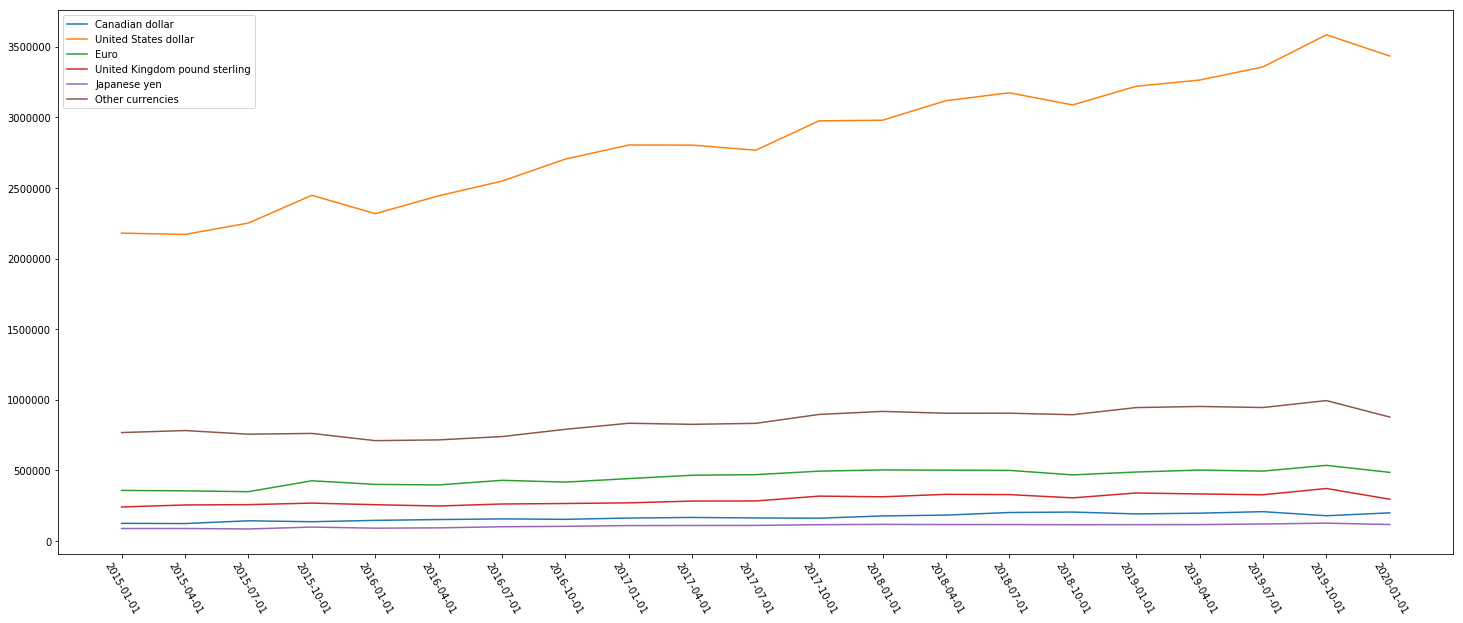

In [27]:
data_currency_a=data[data['Canada\'s international investment position'].isin(['Total assets'])].groupby(['Currency','REF_DATE']).sum()
#plt.rcParams['figure.figsize'] = (25,10)
for i in list(data['Currency'].unique()[1:]):
    plt.plot(data_currency_a.loc[(i)],label=i)
plt.legend()
plt.xticks(rotation=300)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

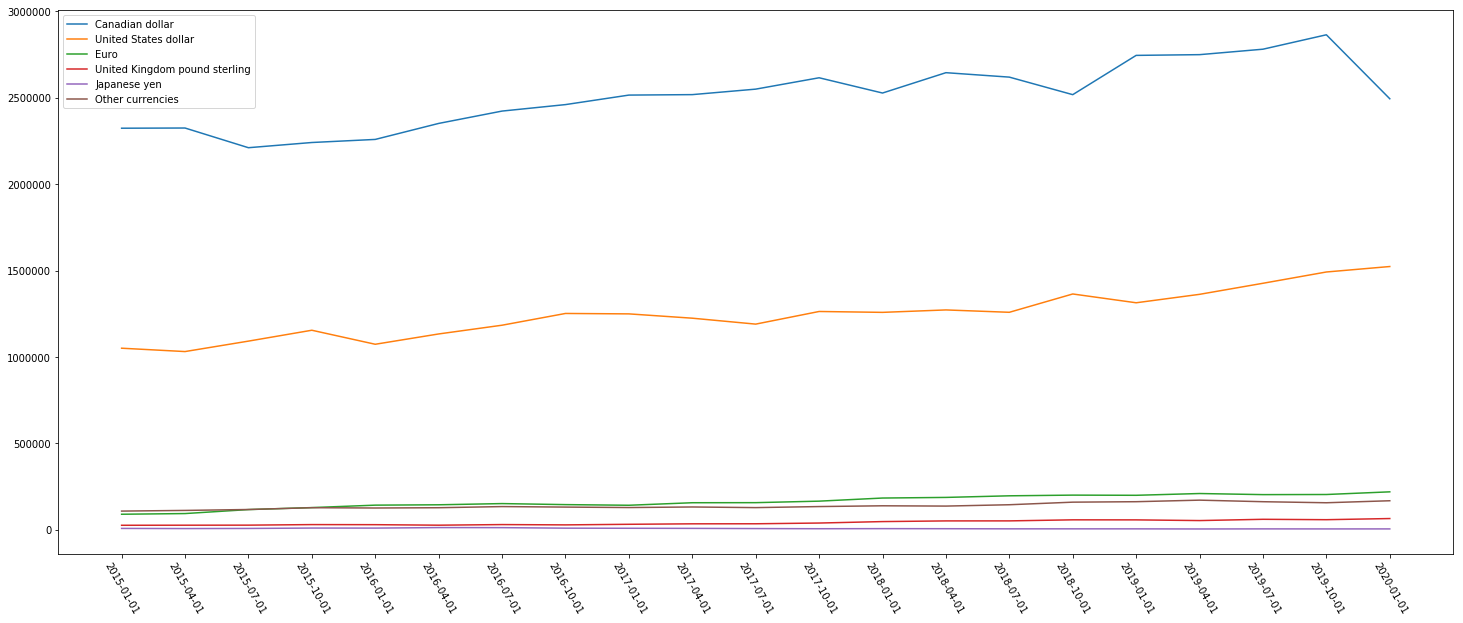

In [28]:
data_currency_l=data[data['Canada\'s international investment position'].isin(['Total liabilities'])].groupby(['Currency','REF_DATE']).sum()
for i in list(data['Currency'].unique()[1:]):
    plt.plot(data_currency_l.loc[(i)],label=i)
plt.legend()
plt.xticks(rotation=300)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

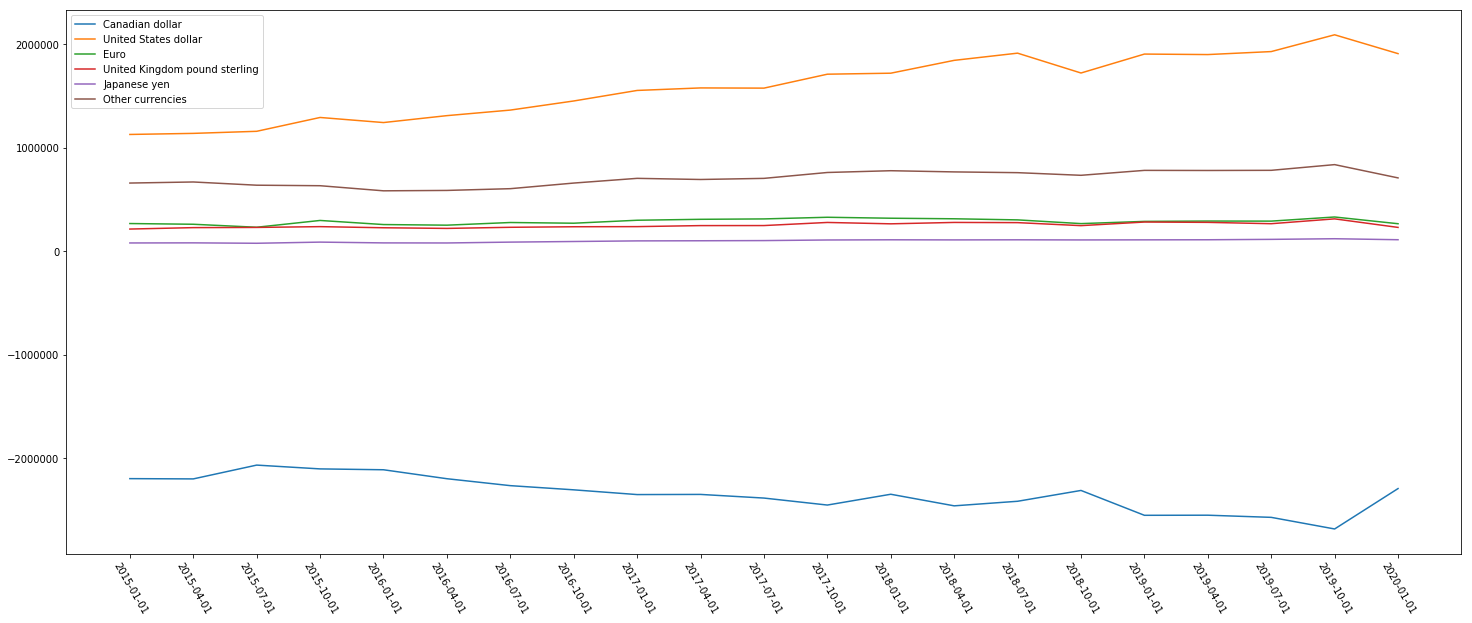

In [29]:
data_currency_n=data_currency_a-data_currency_l
plt.rcParams['figure.figsize'] = (25,10)
for i in list(data['Currency'].unique()[1:]):
    plt.plot(data_currency_n.loc[(i)],label=i)
plt.legend()
plt.xticks(rotation=300)

- Analysis
    - The fisrt figure shows the trend of total assets for each currency from 2015 to 2020. We can see that the United States dollar has the highest share of assets, which means that most of the international financial assets owned by Canadian residents are denominated in U.S. dollars.
    - The second figure shows the trend of total liabilities for each currency from 2015 to 2020. It can be seen that Canada has the highest international financial liabilities in Canadian dollars, followed by U.S. dollars.
    - The third figure shows the net international investment position which is the difference between total international financial assets and total international financial liabilities. Only the Canadian dollar has a negitive net international inverstment position, and all other currencies are positive.
    

In [30]:
data_new=data[data['Currency'].isin(['All currencies'])]
data_new=data_new[data_new['REF_DATE'].isin(['2019-01-01','2020-01-01'])]
label=['Direct investment assets','Canadian portfolio investment','Official international reserves','Other Canadian investment']
data_asset=data_new[data_new['Canada\'s international investment position'].isin(label)]

([<matplotlib.patches.Wedge at 0x26da63c0780>,
 [Text(0.438937,1.00863,'Direct investment assets'),
  Text(-0.955039,-0.545802,'Canadian portfolio investment'),
  Text(0.386987,-1.02968,'Official international reserves'),
  Text(0.925996,-0.593744,'Other Canadian investment')],
 [Text(0.23942,0.550162,'36.9%'),
  Text(-0.52093,-0.29771,'42.7%'),
  Text(0.211084,-0.561644,'2.3%'),
  Text(0.505089,-0.32386,'18.1%')])

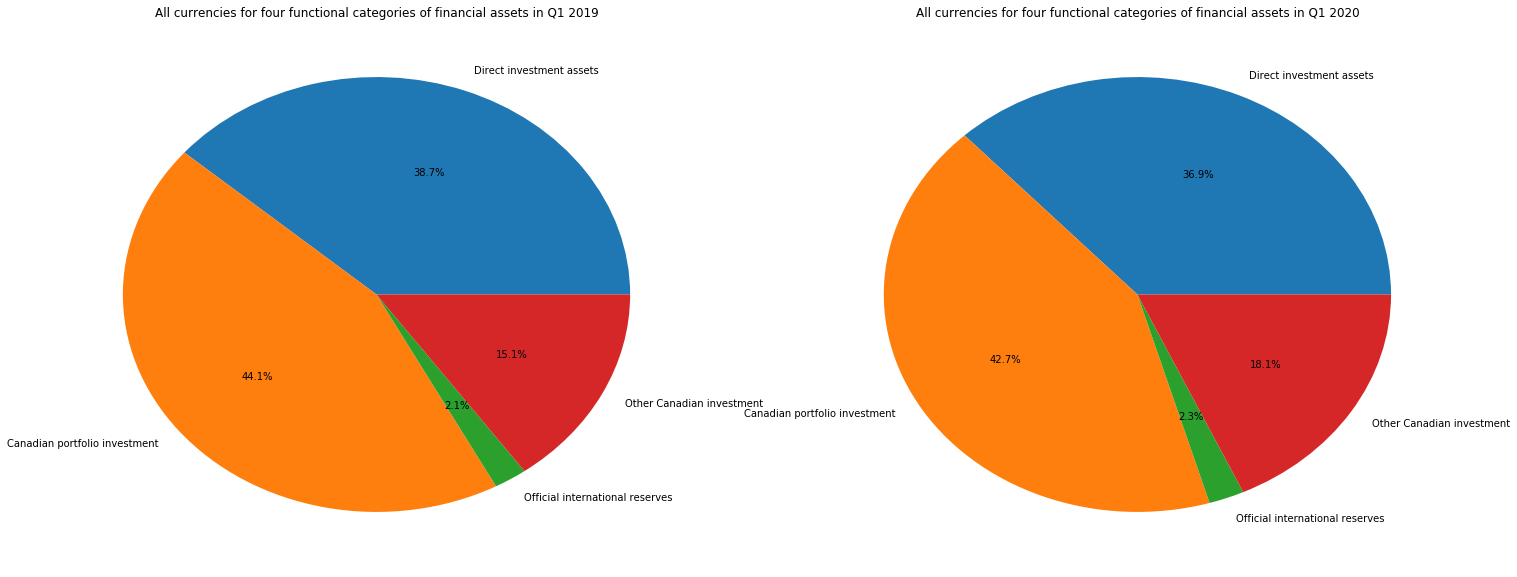

In [31]:
plt.subplot(121)
plt.title('All currencies for four functional categories of financial assets in Q1 2019')
plt.pie(data_asset[0:4]['VALUE'],labels=label,autopct="%3.1f%%")
plt.subplot(122)
plt.title('All currencies for four functional categories of financial assets in Q1 2020')
plt.pie(data_asset[4:8]['VALUE'],labels=label,autopct="%3.1f%%")

([<matplotlib.patches.Wedge at 0x26da643fda0>,
 [Text(0.7269,0.825601,'Direct investment liabilities'),
  Text(-1.08513,-0.180284,'Foreign portfolio investment'),
  Text(0.852382,-0.695302,'Other foreign investment')],
 [Text(0.396491,0.450328,'27.0%'),
  Text(-0.591887,-0.0983366,'51.2%'),
  Text(0.464935,-0.379256,'21.8%')])

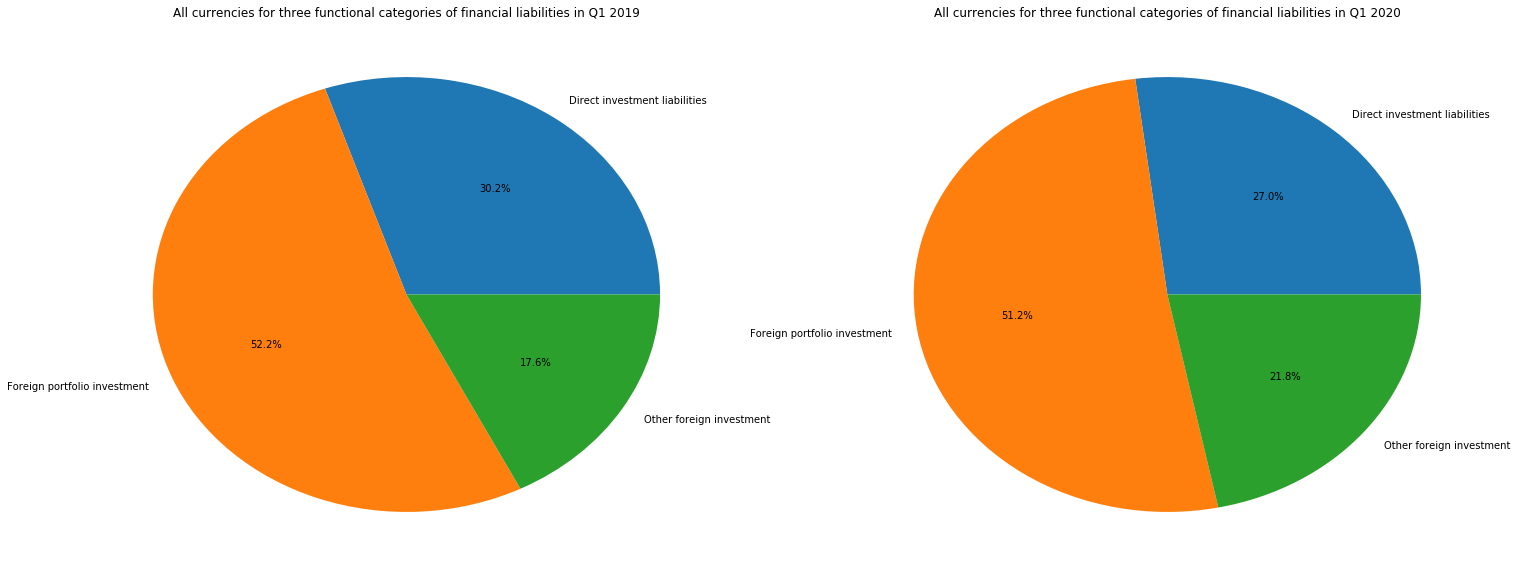

In [32]:
label=['Direct investment liabilities','Foreign portfolio investment','Other foreign investment']
data_liability=data_new[data_new['Canada\'s international investment position'].isin(label)]
plt.subplot(121)
plt.title('All currencies for three functional categories of financial liabilities in Q1 2019')
plt.pie(data_liability[0:3]['VALUE'],labels=label,autopct="%3.1f%%")
plt.subplot(122)
plt.title('All currencies for three functional categories of financial liabilities in Q1 2020')
plt.pie(data_liability[3:6]['VALUE'],labels=label,autopct="%3.1f%%")

- Analysis
    - There are four functional categories of financial assets in the international investment position: direct investment assets, Canadian portfolio investment, official international reserves and other Canadian investment. We compare the proportion of each type of asset for all currencies in Q1 2019 and Q1 2020 in the first two pie charts.There is no significant difference between Q1 2019 and Q1 2020. Canadian portfolio investment accounts for the highest proportion, followed by direct investment assets, while the lowest proportion of total assets is official international reserves.
    - There are three functional categories of financial liabilities in the international investment position: direct investment liabilities, foreign portfolio investment, and other foreign investment. We compare the proportion of each type of liability for all currencies in Q1 2019 and Q1 2020 in the second two pie charts. As can be seen from the charts, direct investment liabilities and foreign portfolio investments both decreased from Q1 2019 to Q1 2020, while the proportion of other foreign investments increased.
    